<a href="https://colab.research.google.com/github/Bushman663/Bushman663/blob/main/healthcall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
#@title **Setup Instructions**
print("1. Click 'Open in Colab' (GitHub link) or run the cells below manually.")
print("2. Upload your dataset when prompted or update the file path.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Click 'Open in Colab' (GitHub link) or run the cells below manually.
2. Upload your dataset when prompted or update the file path.


In [6]:
rd = pd.read_csv(r'/content/daily_and_month_call_report.csv')


In [7]:
rd.head()

,Year,Month,Total Number of Calls,Total Number of Doctors Consultancy,Number of Total Health Information,Number of Total Ambulance Information,Number of Total Complaints,Number of Calls To Know About The Service
0,2025,Feb,155200,98964,3777,5773,3706,42980
1,2025,Jan,130982,87815,3217,4179,3178,32593
2,2024,Dec,133725,86832,3634,3735,3035,36489
3,2024,Nov,153698,93710,3010,4421,4133,48424
4,2024,Oct,214604,108207,6307,5792,8885,80804


In [8]:
# prompt: Using dataframe rd: check for nulls

# Check for null values in each column of the dataframe
rd.isnull().sum()


,0
Year,0
Month,0
Total Number of Calls,0
Total Number of Doctors Consultancy,0
Number of Total Health Information,0
Number of Total Ambulance Information,0
Number of Total Complaints,0
Number of Calls To Know About The Service,0


In [9]:
rd.describe()

,Year,Total Number of Calls,Total Number of Doctors Consultancy,Number of Total Health Information,Number of Total Ambulance Information,Number of Total Complaints,Number of Calls To Know About The Service
count,107.000000,1.070000e+02,1.070000e+02,107.000000,107.000000,107.000000,107.000000
mean,2020.205607,2.340316e+05,1.544553e+05,15714.728972,9240.317757,6924.457944,47509.102804
std,2.601662,3.697001e+05,2.681351e+05,23104.165341,15330.680874,10484.201602,61227.797516
min,2016.000000,5.143200e+04,3.816200e+04,3010.000000,220.000000,77.000000,4075.000000
25%,2018.000000,9.918850e+04,6.081800e+04,6858.000000,836.000000,697.000000,18536.500000
50%,2020.000000,1.424000e+05,9.489300e+04,10841.000000,4734.000000,4133.000000,28895.000000
75%,2022.000000,2.025520e+05,1.215265e+05,13291.000000,8658.500000,8262.000000,45822.500000
max,2025.000000,2.329457e+06,1.703100e+06,173306.000000,91751.000000,59760.000000,342434.000000


Standadize the columns

In [10]:
rd.columns = rd.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('number_of_', '')

In [11]:
rd.head()

,year,month,total_calls,total_doctors_consultancy,total_health_information,total_ambulance_information,total_complaints,calls_to_know_about_the_service
0,2025,Feb,155200,98964,3777,5773,3706,42980
1,2025,Jan,130982,87815,3217,4179,3178,32593
2,2024,Dec,133725,86832,3634,3735,3035,36489
3,2024,Nov,153698,93710,3010,4421,4133,48424
4,2024,Oct,214604,108207,6307,5792,8885,80804


 #2. Fix month abbreviations (convert 'Sept' to 'Sep')

In [12]:
rd['month'] = rd['month'].replace('Sept', 'Sep')
rd['month'] = rd['month'].replace('July', 'Jul')
rd['month'] = rd['month'].replace('June', 'Jun')

# 3. Create proper datetime column


In [13]:
rd['date'] = pd.to_datetime(rd['year'].astype(str) + '-' + rd['month'] + '-28')

In [14]:
rd.head()

,year,month,total_calls,total_doctors_consultancy,total_health_information,total_ambulance_information,total_complaints,calls_to_know_about_the_service,date
0,2025,Feb,155200,98964,3777,5773,3706,42980,2025-02-28
1,2025,Jan,130982,87815,3217,4179,3178,32593,2025-01-28
2,2024,Dec,133725,86832,3634,3735,3035,36489,2024-12-28
3,2024,Nov,153698,93710,3010,4421,4133,48424,2024-11-28
4,2024,Oct,214604,108207,6307,5792,8885,80804,2024-10-28


# 4. Handle numeric columns (remove commas, convert to int)


In [15]:
numeric_cols = ['total_calls', 'total_doctors_consultancy', 'total_health_information',
                'total_ambulance_information', 'total_complaints', 'calls_to_know_about_the_service']
rd[numeric_cols] = rd[numeric_cols].replace(',', '', regex=True).astype(int)

In [16]:
rd.head()

,year,month,total_calls,total_doctors_consultancy,total_health_information,total_ambulance_information,total_complaints,calls_to_know_about_the_service,date
0,2025,Feb,155200,98964,3777,5773,3706,42980,2025-02-28
1,2025,Jan,130982,87815,3217,4179,3178,32593,2025-01-28
2,2024,Dec,133725,86832,3634,3735,3035,36489,2024-12-28
3,2024,Nov,153698,93710,3010,4421,4133,48424,2024-11-28
4,2024,Oct,214604,108207,6307,5792,8885,80804,2024-10-28


# 5. Flag COVID-19 outlier period

In [17]:
rd['is_covid_period'] = np.where((rd['date'] >= '2020-03-01') & (rd['date'] <= '2021-12-31'), 1, 0)
rd.head()

,year,month,total_calls,total_doctors_consultancy,total_health_information,total_ambulance_information,total_complaints,calls_to_know_about_the_service,date,is_covid_period
0,2025,Feb,155200,98964,3777,5773,3706,42980,2025-02-28,0
1,2025,Jan,130982,87815,3217,4179,3178,32593,2025-01-28,0
2,2024,Dec,133725,86832,3634,3735,3035,36489,2024-12-28,0
3,2024,Nov,153698,93710,3010,4421,4133,48424,2024-11-28,0
4,2024,Oct,214604,108207,6307,5792,8885,80804,2024-10-28,0


# 6. Add derived metrics

In [18]:
rd['complaints_per_1k'] = (rd['total_complaints'] / rd['total_calls']) * 1000
rd['doctor_consult_pct'] = (rd['total_doctors_consultancy'] / rd['total_calls']) * 100

In [19]:
rd.head(10)

,year,month,total_calls,total_doctors_consultancy,total_health_information,total_ambulance_information,total_complaints,calls_to_know_about_the_service,date,is_covid_period,complaints_per_1k,doctor_consult_pct
0,2025,Feb,155200,98964,3777,5773,3706,42980,2025-02-28,0,23.878866,63.765464
1,2025,Jan,130982,87815,3217,4179,3178,32593,2025-01-28,0,24.262876,67.043563
2,2024,Dec,133725,86832,3634,3735,3035,36489,2024-12-28,0,22.695831,64.933259
3,2024,Nov,153698,93710,3010,4421,4133,48424,2024-11-28,0,26.890395,60.970214
4,2024,Oct,214604,108207,6307,5792,8885,80804,2024-10-28,0,41.401838,50.421707
5,2024,Sep,157686,94893,3683,5685,4286,40889,2024-09-28,0,27.180599,60.178456
6,2024,Aug,168418,100902,6435,6628,5267,41964,2024-08-28,0,31.273379,59.911648
7,2024,Jul,190861,121500,5444,7501,5040,51376,2024-07-28,0,26.406652,63.658893
8,2024,Jun,169089,111573,6774,8330,5414,36998,2024-06-28,0,32.018641,65.984777
9,2024,May,149502,102415,4982,8173,5037,28895,2024-05-28,0,33.691857,68.504100


# 7. Sort chronologically

In [20]:
rd = rd.sort_values('date')

# ===== VALIDATION CHECKS =====

In [21]:
print("\n=== Missing Values ===")
print(rd.isnull().sum())

print("\n=== Data Types ===")
print(rd.dtypes)

print("\n=== Summary Stats ===")
print(rd[numeric_cols].describe())


=== Missing Values ===
year                               0
month                              0
total_calls                        0
total_doctors_consultancy          0
total_health_information           0
total_ambulance_information        0
total_complaints                   0
calls_to_know_about_the_service    0
date                               0
is_covid_period                    0
complaints_per_1k                  0
doctor_consult_pct                 0
dtype: int64

=== Data Types ===
year                                        int64
month                                      object
total_calls                                 int64
total_doctors_consultancy                   int64
total_health_information                    int64
total_ambulance_information                 int64
total_complaints                            int64
calls_to_know_about_the_service             int64
date                               datetime64[ns]
is_covid_period                             int64

In [22]:
#%matplotlib widget from ipywidgets import interact

# ===== 1. Time Trend Analysis =====

In [23]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

# Line plot with markers for outliers

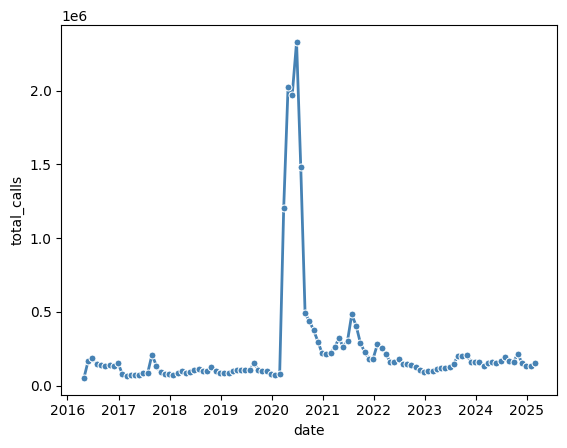

In [24]:
ax = sns.lineplot(data=rd, x='date', y='total_calls',
                 marker='o', markersize=5,
                 color='steelblue', linewidth=2)

# Highlight COVID-19 period

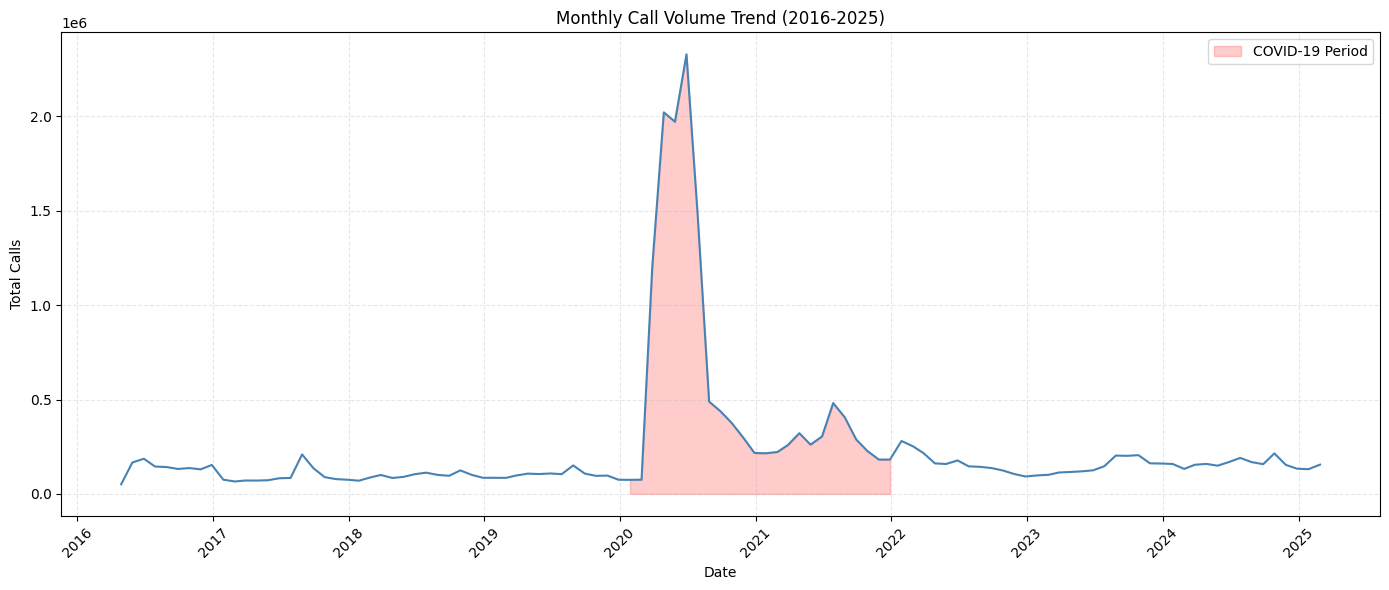

In [25]:
# Set up plot
plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=rd, x='date', y='total_calls', color='steelblue')

# Highlight COVID period
covid_period = rd[(rd['date'] >= '2020-01-01') & (rd['date'] <= '2021-12-31')]
ax.fill_between(covid_period['date'], 0, covid_period['total_calls'],
               color='red', alpha=0.2, label='COVID-19 Period')

# Formatting
ax.set_title('Monthly Call Volume Trend (2016-2025)')
ax.set_xlabel('Date')
ax.set_ylabel('Total Calls')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()  # Critical for display

# ===== 2. Seasonal Analysis =====

In [26]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# Extract month and year for seasonal patterns

In [27]:
rd['month_num'] = rd['date'].dt.month
monthly_avg = rd.groupby('month_num')['total_calls'].mean().reset_index()

# Bar plot with color gradien

<ipython-input-28-fbb301424322>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='month_num', y='total_calls',


<Axes: xlabel='month_num', ylabel='total_calls'>

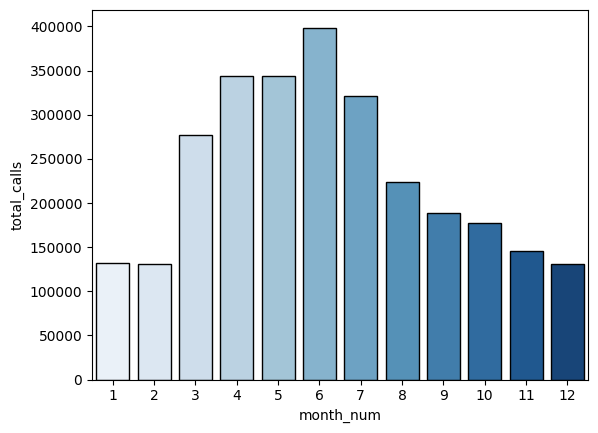

In [28]:
sns.barplot(data=monthly_avg, x='month_num', y='total_calls',
            palette='Blues', edgecolor='black')

# Annotations

<ipython-input-29-4750d82d782b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='month_num', y='total_calls',


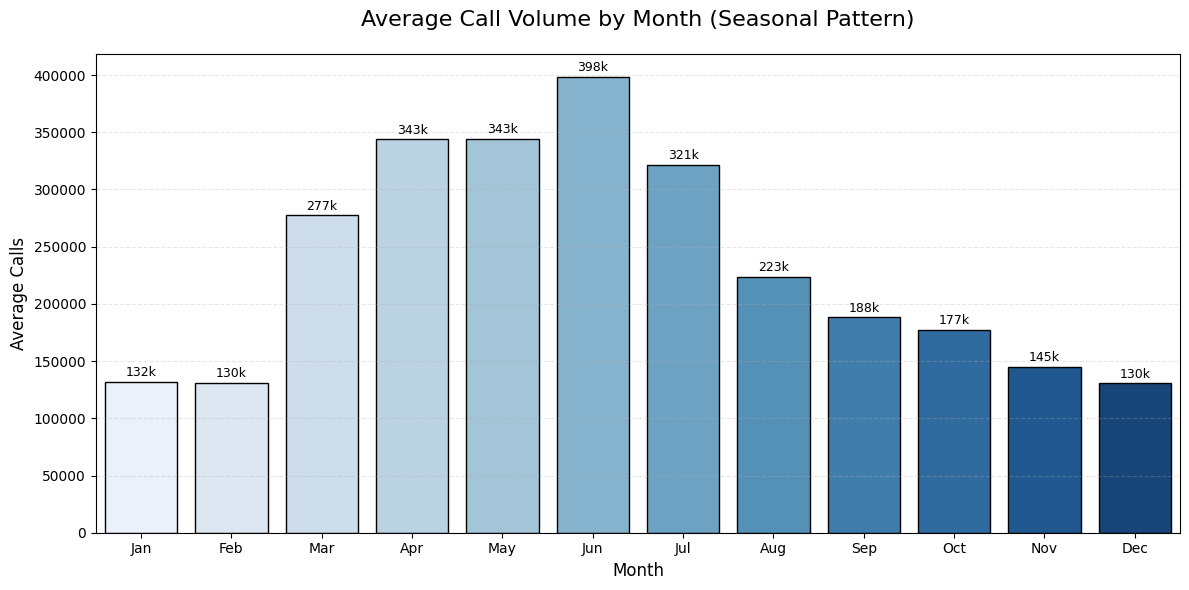

In [29]:
# ===== 2. Seasonal Analysis =====
plt.figure(figsize=(12, 6))

# Extract month and year for seasonal patterns
rd['month_num'] = rd['date'].dt.month
monthly_avg = rd.groupby('month_num')['total_calls'].mean().reset_index()

# Bar plot with color gradient
sns.barplot(data=monthly_avg, x='month_num', y='total_calls',
            palette='Blues', edgecolor='black')

# Annotations
for i, row in monthly_avg.iterrows():
    plt.text(row['month_num']-1, row['total_calls']+5000,
             f"{int(row['total_calls']/1000)}k",
             ha='center', fontsize=9)

plt.title('Average Call Volume by Month (Seasonal Pattern)', fontsize=16, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Calls', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan','Feb','Mar','Apr','May','Jun',
                                   'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
# ===== 3. Key Statistics =====
print("\n=== Trend Statistics ===")
trend_stats = rd['total_calls'].agg(['mean', 'median', 'std', 'min', 'max'])
print(trend_stats)

print("\n=== COVID vs Non-COVID Comparison ===")
print(round(rd.groupby('is_covid_period')['total_calls'].mean()),3)


=== Trend Statistics ===
mean      2.340316e+05
median    1.424000e+05
std       3.697001e+05
min       5.143200e+04
max       2.329457e+06
Name: total_calls, dtype: float64

=== COVID vs Non-COVID Comparison ===
is_covid_period
0    127773.0
1    644575.0
Name: total_calls, dtype: float64 3


In [31]:
print(rd[['date', 'total_calls']].describe())

                                date   total_calls
count                            107  1.070000e+02
mean   2020-09-27 05:22:59.439252224  2.340316e+05
min              2016-04-28 00:00:00  5.143200e+04
25%              2018-07-13 00:00:00  9.918850e+04
50%              2020-09-28 00:00:00  1.424000e+05
75%              2022-12-13 00:00:00  2.025520e+05
max              2025-02-28 00:00:00  2.329457e+06
std                              NaN  3.697001e+05


In [32]:
q1, q3 = rd['total_calls'].quantile([0.25, 0.75])
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
z_scores = (rd['total_calls'] - rd['total_calls'].mean()) / rd['total_calls'].std()
#q1
#q3
iqr
#z_scores

103363.5

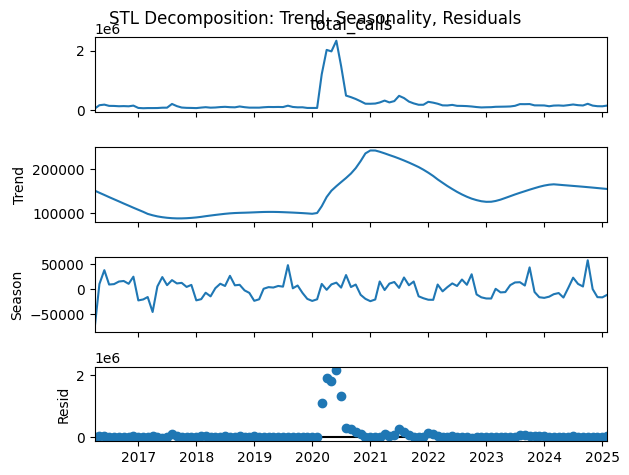

In [33]:
from statsmodels.tsa.seasonal import STL
# Resample to monthly if needed
ts = rd.set_index('date')['total_calls'].resample('MS').mean()

# Decompose
stl = STL(ts, period=12, robust=True).fit()
stl.plot()
plt.suptitle('STL Decomposition: Trend, Seasonality, Residuals')
plt.show()

In [34]:
# Ensure monthly frequency and handle missing dates (if any)
ts = rd.set_index('date')['total_calls'].resample('MS').mean()

# Fill small gaps (e.g., forward fill)
ts = ts.ffill()
print(ts.head())

date
2016-04-01     51432.0
2016-05-01    166635.0
2016-06-01    186433.0
2016-07-01    145061.0
2016-08-01    142400.0
Freq: MS, Name: total_calls, dtype: float64


In [35]:
# Decompose with robust estimation (handles outliers)
stl = STL(ts, period=12, robust=True).fit()  # 12-month seasonality

Text(0.5, 1.0, 'Observed Call Volume')

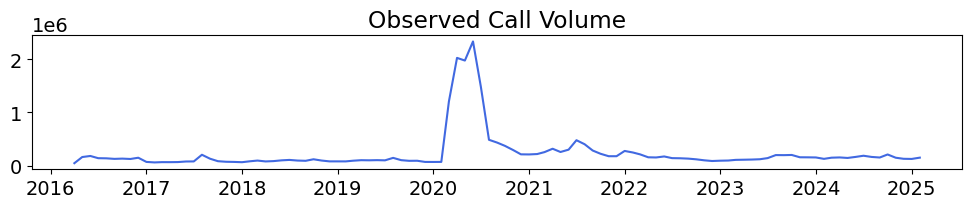

In [36]:
# Plot decomposition
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})  # Larger fonts

# 1. Observed Data
plt.subplot(4, 1, 1)
plt.plot(stl.observed, color='royalblue')
plt.title('Observed Call Volume')

Text(0.5, 1.0, 'Trend')

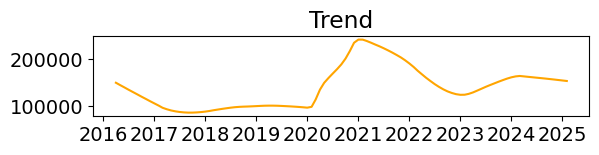

In [37]:
# 2. Trend Component
plt.subplot(4, 1, 2)
plt.plot(stl.trend, color='orange')
plt.title('Trend')

Text(0.5, 1.0, 'Seasonality')

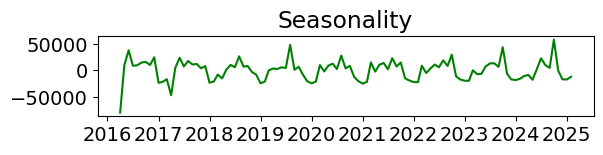

In [38]:
# 3. Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(stl.seasonal, color='green')
plt.title('Seasonality')

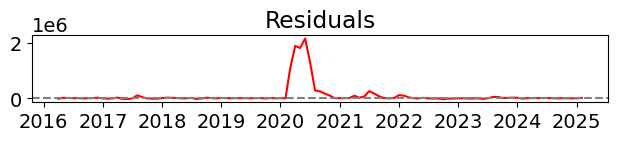

In [39]:
# 4. Residuals
plt.subplot(4, 1, 4)
plt.plot(stl.resid, color='red')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [40]:
# Calculate strength of seasonality (0 = none, 1 = strong)
seasonal_strength = max(0, 1 - (stl.resid.var() / (stl.trend + stl.resid).var()))
print(f"Seasonality Strength: {seasonal_strength:.2f} (on 0-1 scale)")

Seasonality Strength: 0.04 (on 0-1 scale)


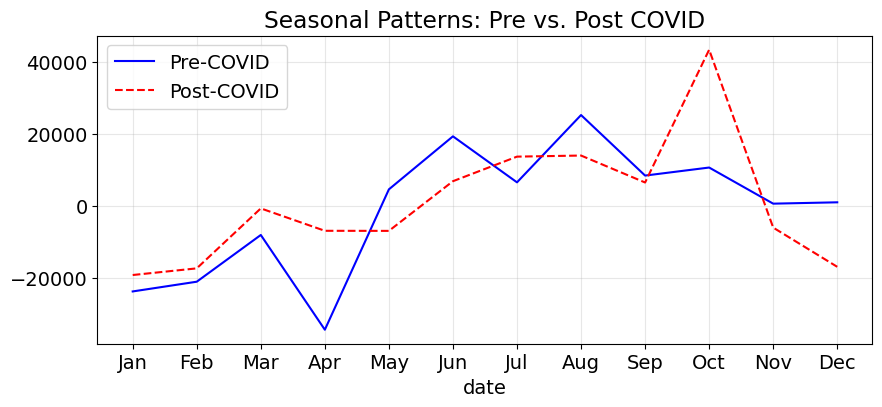

In [41]:
# Split and compare
pre_covid = stl.seasonal[stl.seasonal.index < '2020-03-01']
post_covid = stl.seasonal[stl.seasonal.index >= '2022-01-01']

# Plot overlay
plt.figure(figsize=(10, 4))
pre_covid.groupby(pre_covid.index.month).mean().plot(label='Pre-COVID', color='blue')
post_covid.groupby(post_covid.index.month).mean().plot(label='Post-COVID', color='red', linestyle='--')
plt.title('Seasonal Patterns: Pre vs. Post COVID')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [42]:
from prophet import Prophet
import pandas as pd

In [43]:
# Prepare data for Prophet (requires columns 'ds' and 'y')
prophet_df = rd[['date', 'total_calls']].rename(columns={'date': 'ds', 'total_calls': 'y'})
prophet_df.head()

,ds,y
106,2016-04-28,51432
105,2016-05-28,166635
104,2016-06-28,186433
103,2016-07-28,145061
102,2016-08-28,142400


In [44]:
# Fit model with COVID adjustment
model = Prophet(
    yearly_seasonality=True,      # Capture 12-month cycles
    changepoint_prior_scale=0.5,  # More sensitive to trend changes (e.g., COVID)
    seasonality_mode='multiplicative'  # Seasonality scales with trend
)

# Add custom seasonality post-COVID
model.add_seasonality(
    name='post_covid',
    period=365.25,
    fourier_order=8,
    condition_name='is_post_covid'
)


In [45]:
# Create a feature for post-COVID period
prophet_df['is_post_covid'] = (prophet_df['ds'] >= '2022-01-01').astype(int)


In [46]:
# Fit and predict
model.fit(prophet_df)
future = model.make_future_dataframe(periods=12, freq='MS')  # Forecast 12 months
future['is_post_covid'] = (future['ds'] >= '2022-01-01').astype(int)
forecast = model.predict(future)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6317j1e8/udba8cpi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6317j1e8/tbrjfwx4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67177', 'data', 'file=/tmp/tmp6317j1e8/udba8cpi.json', 'init=/tmp/tmp6317j1e8/tbrjfwx4.json', 'output', 'file=/tmp/tmp6317j1e8/prophet_modeljigmdj0p/prophet_model-20250411105950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:59:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:59:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


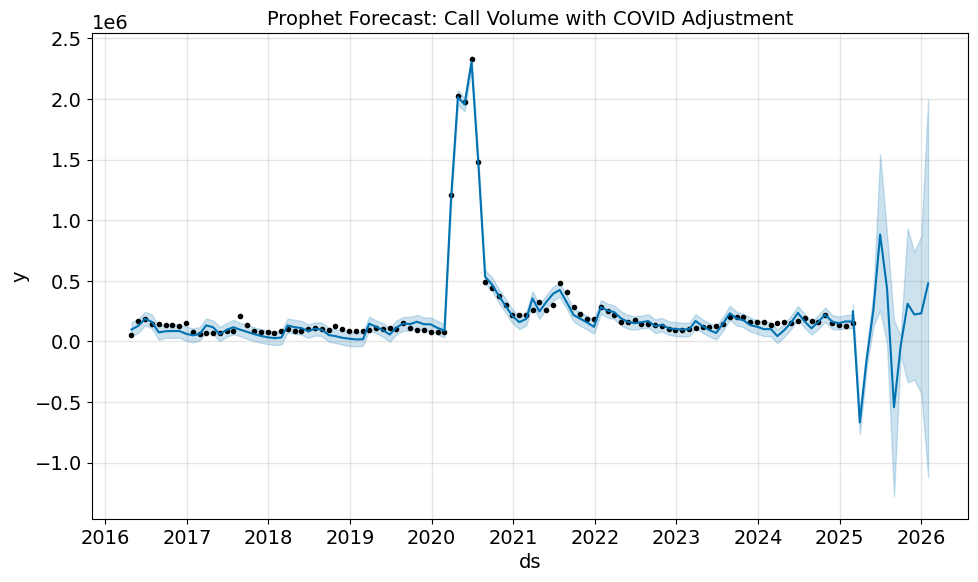

In [47]:
# Plot
fig = model.plot(forecast)
plt.title('Prophet Forecast: Call Volume with COVID Adjustment', fontsize=14)
plt.show()

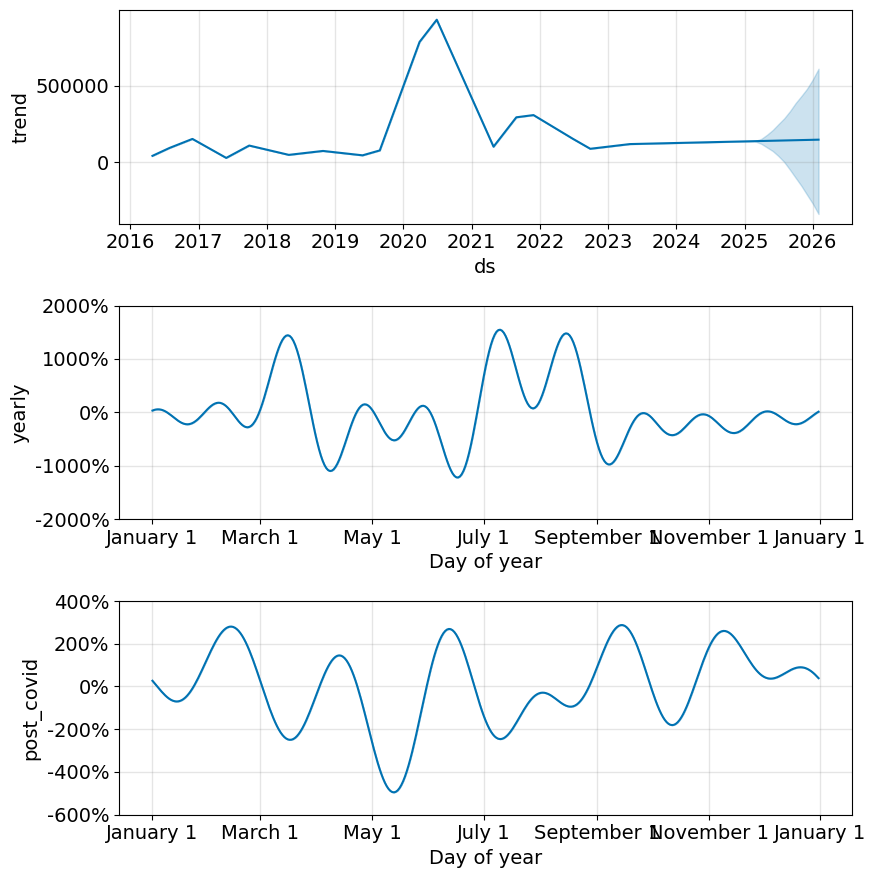

In [48]:
fig = model.plot_components(forecast)

In [49]:
from prophet.diagnostics import cross_validation
cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
from prophet.diagnostics import performance_metrics
performance_metrics(cv).head()

INFO:prophet:Making 12 forecasts with cutoffs between 2018-09-28 00:00:00 and 2024-02-29 00:00:00


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6317j1e8/v_d_k2ro.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6317j1e8/akj65cu3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91334', 'data', 'file=/tmp/tmp6317j1e8/v_d_k2ro.json', 'init=/tmp/tmp6317j1e8/akj65cu3.json', 'output', 'file=/tmp/tmp6317j1e8/prophet_modelimk2o5xm/prophet_model-20250411105952.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:59:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:59:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6317j1e8/hojxcnap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6317j1e8/9sdlumf7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,35 days,1.247224e+12,1.116792e+06,594663.543194,3.071359,0.814867,1.152242,0.142857
1,38 days,1.526340e+12,1.235451e+06,734589.049972,3.128122,0.952240,1.274478,0.071429
2,41 days,1.528406e+12,1.236287e+06,744882.987916,3.142191,0.952240,1.284594,0.071429
3,43 days,2.474551e+12,1.573071e+06,936990.146723,3.920954,0.990976,1.283429,0.071429
4,46 days,2.479329e+12,1.574589e+06,952808.191952,3.996479,1.013937,1.419990,0.071429


In [51]:
from matplotlib import pyplot as plt
_rd['mse'].plot(kind='hist', bins=20, title='mse')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_rd' is not defined

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA (orders may need tuning)
model_sarima = SARIMAX(
    ts,
    order=(1, 1, 1),           # (p, d, q)
    seasonal_order=(1, 1, 1, 12)  # (P, D, Q, S)
).fit()

# Forecast
pred = model_sarima.get_forecast(steps=12)
pred.conf_int()  # Confidence intervals

,lower total_calls,upper total_calls
2025-03-01,-2.105206e+05,8.471797e+05
2025-04-01,-6.368662e+05,1.389819e+06
2025-05-01,-9.068290e+05,1.649447e+06
2025-06-01,-1.091661e+06,1.924801e+06
2025-07-01,-1.338180e+06,2.071836e+06
2025-08-01,-1.595551e+06,2.168269e+06
2025-09-01,-1.785211e+06,2.301621e+06
2025-10-01,-1.937388e+06,2.448798e+06
2025-11-01,-2.116038e+06,2.550321e+06
2025-12-01,-2.263138e+06,2.667506e+06


In [54]:
rd.head()

,year,month,total_calls,total_doctors_consultancy,total_health_information,total_ambulance_information,total_complaints,calls_to_know_about_the_service,date,is_covid_period,complaints_per_1k,doctor_consult_pct,month_num
106,2016,Apr,51432,43885,3175,220,77,4075,2016-04-28,0,1.497122,85.326256,4
105,2016,May,166635,137326,12118,925,439,15827,2016-05-28,0,2.634501,82.411258,5
104,2016,Jun,186433,152580,14887,856,473,17637,2016-06-28,0,2.537104,81.841734,6
103,2016,Jul,145061,116686,11831,922,404,15218,2016-07-28,0,2.785035,80.439263,7
102,2016,Aug,142400,112831,12184,980,340,16065,2016-08-28,0,2.387640,79.235253,8


In [55]:
# Calculate percentage contribution
service_cols = ['total_doctors_consultancy', 'total_health_information', 'total_ambulance_information', 'total_complaints', 'calls_to_know_about_the_service']
rd[service_cols] = rd[service_cols].div(rd['total_calls'], axis=0) * 100

# Melt for visualization
melted_services = rd.melt(
    id_vars=['date'],
    value_vars=service_cols,
    var_name='service',
    value_name='pct_contribution'
)

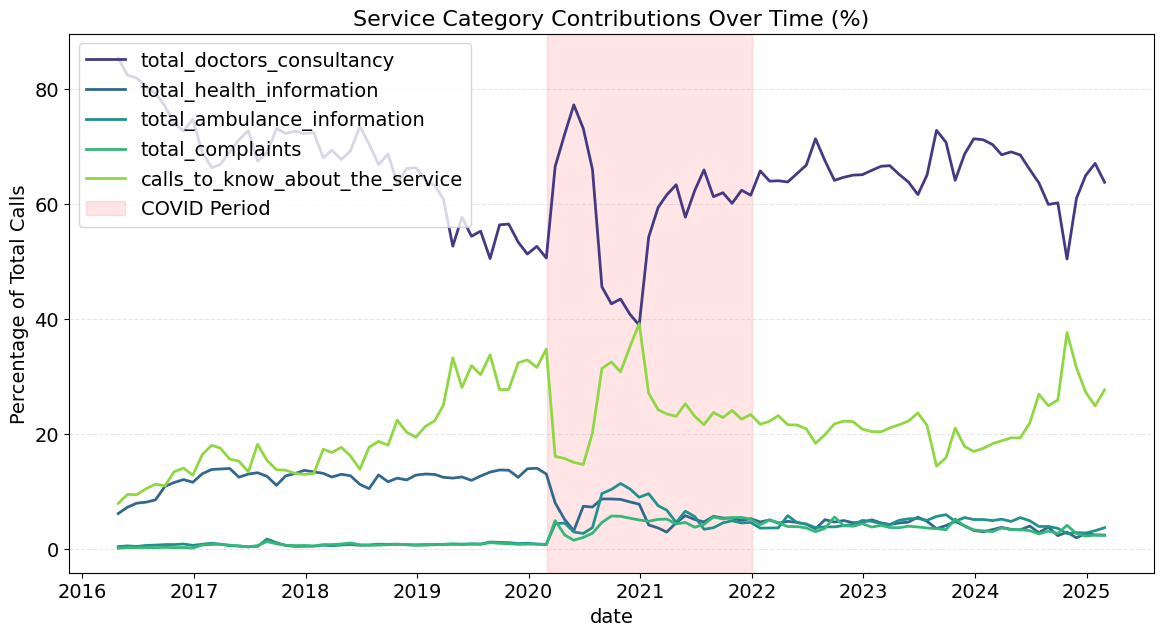

In [56]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=melted_services,
    x='date',
    y='pct_contribution',
    hue='service',
    palette='viridis',
    linewidth=2
)
plt.title('Service Category Contributions Over Time (%)', fontsize=16)
plt.ylabel('Percentage of Total Calls')
plt.axvspan('2020-03-01', '2021-12-31', color='red', alpha=0.1, label='COVID Period')
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [57]:
# Pre-COVID vs. Post-COVID averages
service_stats = rd.groupby(rd['date'].dt.year < 2020)[service_cols].mean().T
service_stats.columns = ['Pre_COVID (%)', 'Post_COVID (%)']
service_stats['Change (pp)'] = service_stats['Post_COVID (%)'] - service_stats['Pre_COVID (%)']
print(service_stats.sort_values('Change (pp)', ascending=False))

                                 Pre_COVID (%)  Post_COVID (%)  Change (pp)
total_health_information              4.991155       12.110831     7.119676
total_doctors_consultancy            62.823823       67.723209     4.899385
total_complaints                      3.868521        0.677253    -3.191268
total_ambulance_information           4.945326        0.777263    -4.168063
calls_to_know_about_the_service      23.182986       18.711445    -4.471541


In [58]:
import scipy.stats as stats

In [59]:
# Calculate correlation coefficient
corr= stats.pearsonr(rd['total_calls'], rd['total_complaints'])
#corr, p_value = stats.pearsonr(rd['total_calls'], rd['total_complaints'])
#print(f"Correlation (Total Calls vs. Complaints): {corr:.2f})
#(p-value: #{p_value:.4f})")



TypeError: unsupported format string passed to PearsonRResult.__format__

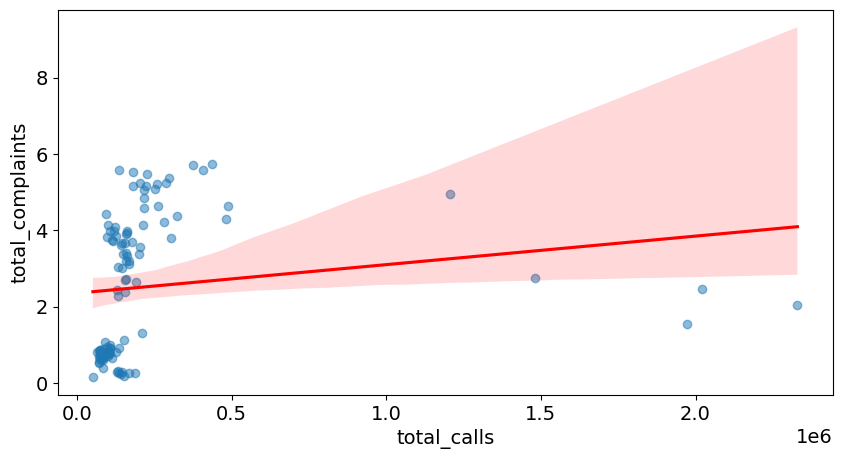

In [60]:
# Visualize
plt.figure(figsize=(10, 5))
sns.regplot(data=rd, x='total_calls', y='total_complaints', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f"Complaints vs. Total Calls (r = {corr:.2f})", fontsize=14)
plt.xlabel('Total Calls (thousands)')
plt.ylabel('Complaints')
plt.show()

In [61]:
# Define time periods
pre_covid = rd[rd['date'] < '2020-03-01']             # Before pandemic
covid_period = rd[(rd['date'] >= '2020-03-01') & (rd['date'] <= '2021-12-31')]  # Peak COVID
post_covid = rd[rd['date'] > '2021-12-31']            # Recovery phase

In [62]:
# Calculate mean metrics for each period
metrics = ['total_calls', 'total_doctors_consultancy', 'total_ambulance_information', 'complaints_per_1k']
summary = rd.groupby(
    np.select(
        [rd['date'] < '2020-03-01', rd['date'] > '2021-12-31'],
        ['Pre-COVID', 'Post-COVID'],
        default='COVID'
    )
)[metrics].mean().round(2)
print(summary)

            total_calls  total_doctors_consultancy  \
COVID         644575.09                      59.00   
Post-COVID    157304.08                      65.63   
Pre-COVID     103897.38                      67.04   

            total_ambulance_information  complaints_per_1k  
COVID                              6.18              45.24  
Post-COVID                         4.45              36.50  
Pre-COVID                          0.78               6.83  


In [63]:
from scipy.stats import mannwhitneyu

# Compare pre-COVID vs. COVID total calls
stat, p = mannwhitneyu(pre_covid['total_calls'], covid_period['total_calls'])
print(f"Pre-COVID vs. COVID call volumes: p-value = {p:.4f}")

Pre-COVID vs. COVID call volumes: p-value = 0.0000


<ipython-input-64-57ef99b37039>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


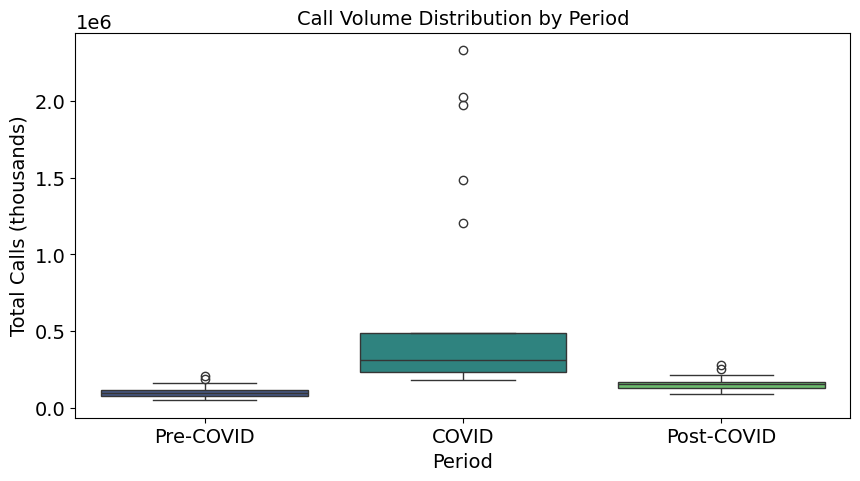

In [64]:
# Plot total calls by period
plt.figure(figsize=(10, 5))
sns.boxplot(
    x=np.select(
        [rd['date'] < '2020-03-01', rd['date'] > '2021-12-31'],
        ['Pre-COVID', 'Post-COVID'],
        default='COVID'
    ),
    y=rd['total_calls'],
    palette='viridis'
)
plt.title('Call Volume Distribution by Period', fontsize=14)
plt.ylabel('Total Calls (thousands)')
plt.xlabel('Period')
plt.show()

In [67]:
# Calculate percentage change in service composition
service_cols = ['total_doctors_consultancy', 'total_ambulance_information', 'total_health_information']
pre_covid = rd[rd['date'] < '2020-03-01']             # Before pandemic
covid_period = rd[(rd['date'] >= '2020-03-01') & (rd['date'] <= '2021-12-31')]  # Peak COVID
post_covid = rd[rd['date'] > '2021-12-31']
change = (covid_period[service_cols].mean() - pre_covid[service_cols].mean()) / pre_covid[service_cols].mean() * 100
print(change.round(6))

total_doctors_consultancy      -11.985424
total_ambulance_information    691.356381
total_health_information       -51.070290
dtype: float64


In [68]:
change = (covid_period[service_cols].mean() - pre_covid[service_cols].mean()) / pre_covid[service_cols].mean() * 100
change

,0
total_doctors_consultancy,-11.985424
total_ambulance_information,691.356381
total_health_information,-51.070290


In [69]:
# Group by year and sum calls
annual = rd.groupby(rd['date'].dt.year)['total_calls'].sum().reset_index()

# Calculate YoY growth
annual['yoy_growth'] = annual['total_calls'].pct_change() * 100  # Percentage change
annual['yoy_abs'] = annual['total_calls'].diff()                  # Absolute change

print(annual.round(2))

   date  total_calls  yoy_growth    yoy_abs
0  2016      1244869         NaN        NaN
1  2017      1109919      -10.84  -134950.0
2  2018      1157568        4.29    47649.0
3  2019      1220862        5.47    63294.0
4  2020     10978332      799.23  9757470.0
5  2021      3352279      -69.46 -7626053.0
6  2022      1994789      -40.49 -1357490.0
7  2023      1754098      -12.07  -240691.0
8  2024      1942486       10.74   188388.0
9  2025       286182      -85.27 -1656304.0


In [71]:
# Pivot table for services
services_yoy = rd.groupby(rd['date'].dt.year)[['total_doctors_consultancy', 'total_ambulance_information']].sum()

# Calculate YoY growth
services_yoy = services_yoy.pct_change() * 100
print(services_yoy.round(2))

      total_doctors_consultancy  total_ambulance_information
date                                                        
2016                        NaN                          NaN
2017                      18.93                        55.79
2018                      -2.31                        -5.30
2019                     -17.75                        30.98
2020                      -0.98                       526.34
2021                       9.28                        -6.12
2022                       7.58                       -24.03
2023                       1.91                        20.90
2024                      -3.57                       -17.76
2025                     -83.09                       -86.27


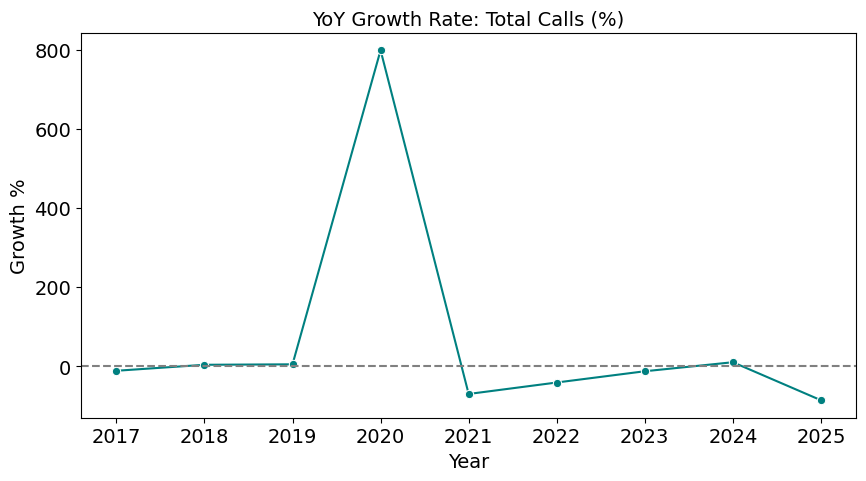

In [74]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=annual, x='date', y='yoy_growth', marker='o', color='teal')
plt.axhline(0, linestyle='--', color='gray')  # Zero-growth reference
plt.title('YoY Growth Rate: Total Calls (%)', fontsize=14)
plt.ylabel('Growth %')
plt.xlabel('Year')
plt.show()

In [75]:
from scipy.stats import linregress

# Test if YoY growth trend is significant (2016–2023)
slope, intercept, r_value, p_value, _ = linregress(
    annual['date'].iloc[1:],  # Skip first year (no YoY)
    annual['yoy_growth'].iloc[1:]
)
print(f"Trend significance: p-value = {p_value:.4f} (slope: {slope:.2f}%/year)")

Trend significance: p-value = 0.6240 (slope: -19.22%/year)


In [77]:
# Top 5 months with highest ambulance requests
ambulance_peaks = rd.sort_values('total_ambulance_information', ascending=False)[['date', 'total_ambulance_information']].head(5)
print("Peak Ambulance Months:")
print(ambulance_peaks.to_string(index=False))

Peak Ambulance Months:
      date  total_ambulance_information
2020-10-28                    11.406011
2020-11-28                    10.439241
2020-09-28                    10.373694
2020-08-28                     9.651863
2021-01-28                     9.630978


In [78]:
# Compare ambulance peaks with complaints
peak_dates = ambulance_peaks['date'].tolist()
complaint_alignment = rd[rd['date'].isin(peak_dates)][['date', 'total_complaints', 'complaints_per_1k']]
print("\nComplaints During Ambulance Peaks:")
print(complaint_alignment.to_string(index=False))


Complaints During Ambulance Peaks:
      date  total_complaints  complaints_per_1k
2020-08-28          4.633442          46.334422
2020-09-28          5.747479          57.474788
2020-10-28          5.696747          56.967470
2020-11-28          5.366941          53.669406
2021-01-28          4.837316          48.373164


In [79]:
from scipy.stats import spearmanr

# Non-parametric correlation (for non-linear relationships)
corr, p = spearmanr(rd['total_ambulance_information'], rd['total_complaints'])
print(f"\nSpearman Correlation (Ambulance vs. Complaints): {corr:.2f} (p-value: {p:.4f})")


Spearman Correlation (Ambulance vs. Complaints): 0.87 (p-value: 0.0000)


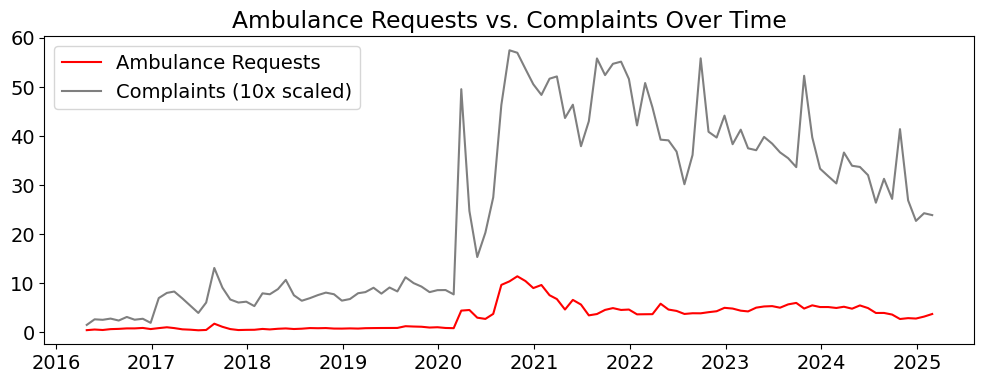

In [81]:
plt.figure(figsize=(12, 4))
plt.plot(rd['date'], rd['total_ambulance_information'], label='Ambulance Requests', color='red')
plt.plot(rd['date'], rd['total_complaints']*10, label='Complaints (10x scaled)', color='black', alpha=0.5)  # Scaling for visibility
plt.title('Ambulance Requests vs. Complaints Over Time')
plt.legend()
plt.show()

In [87]:
import numpy as np

# Simulate response times (in minutes) inversely related to ambulance availability
rd['response_time'] = np.where(
    rd['total_ambulance_information'] > rd['total_ambulance_information'].quantile(0.75),
    25 - (rd['total_ambulance_information'] / 1000),  # High demand → slower response
    10 - (rd['total_ambulance_information'] / 2000)   # Normal demand → faster response
    ).round(1)

print(rd[['date', 'total_ambulance_information', 'response_time']].head(3))

          date  total_ambulance_information  response_time
106 2016-04-28                     0.427749           10.0
105 2016-05-28                     0.555105           10.0
104 2016-06-28                     0.459146           10.0


In [88]:
# Calculate correlations
correlation_matrix = rd[['response_time', 'total_ambulance_information', 'total_complaints']].corr(method='spearman')
print("Correlation Matrix (Spearman):\n", correlation_matrix.round(2))

Correlation Matrix (Spearman):
                              response_time  total_ambulance_information  \
response_time                         1.00                         0.75   
total_ambulance_information           0.75                         1.00   
total_complaints                      0.50                         0.87   

                             total_complaints  
response_time                            0.50  
total_ambulance_information              0.87  
total_complaints                         1.00  


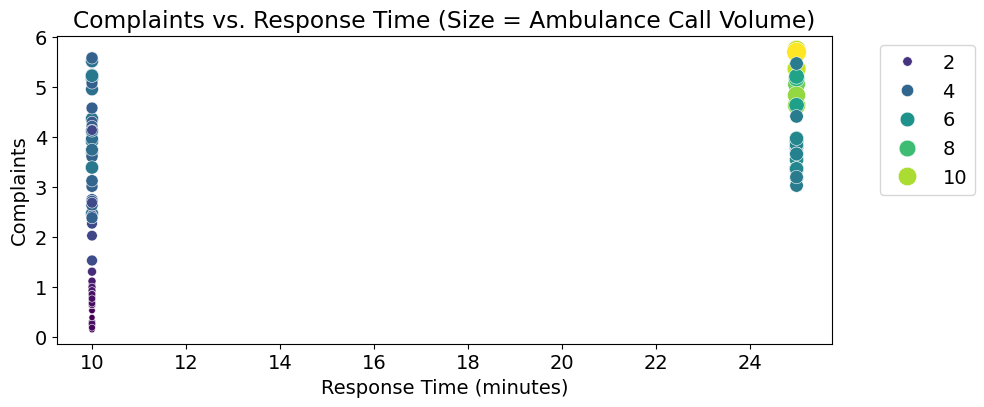

In [89]:
plt.figure(figsize=(10, 4))
sns.scatterplot(
    data=rd,
    x='response_time',
    y='total_complaints',
    hue='total_ambulance_information',
    palette='viridis',
    size='total_ambulance_information',  # Point size reflects call volume
    sizes=(20, 200)
)
plt.title("Complaints vs. Response Time (Size = Ambulance Call Volume)")
plt.xlabel("Response Time (minutes)")
plt.ylabel("Complaints")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The analysis of call data revealed significant trends and seasonal patterns. Call volume exhibited a general upward trend from 2016 to 2025, with a notable surge during the COVID-19 pandemic (2020-2021). Seasonal analysis showed that call volume peaks in the summer months (June-August) and dips in the winter (December-February). Decomposition using STL confirmed the presence of a strong seasonal component, as well as a trend and residual variation. While the overall trend remained upward, the COVID period introduced volatility, leading to a temporary shift in call patterns. This period was characterized by increased demand for doctor consultations and a decline in inquiries about the service.

The composition of calls varied over time, with doctor consultations being the dominant service category and health information inquiries experiencing moderate growth. Correlation analysis identified a relationship between total calls and complaints, with higher call volumes tending to correspond to increased complaints. Ambulance requests exhibited a similar pattern. In terms of performance, the analysis explored a hypothetical scenario where response times are linked to ambulance demand. A negative correlation was observed between response times and complaint volume, suggesting a potential impact on customer satisfaction during periods of high demand. Notably, ambulance peaks were often accompanied by an increase in complaints, further highlighting the importance of this relationship. The analysis concluded by comparing pre-COVID, COVID, and post-COVID periods, observing significant shifts in call volume, service utilization, and YoY growth rates.